In [2]:
import pandas as pd
import numpy as np
from  datetime import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_rows',100)
pd.set_option('display.min_rows',100)
pd.set_option('display.max_columns',150)

In [8]:
import datetime

In [3]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)

In [4]:
data = data.dropna(axis = 0, how = 'all', subset = ['issue_d'])
data = data.dropna(axis = 0, how = 'all', subset = ['earliest_cr_line'])

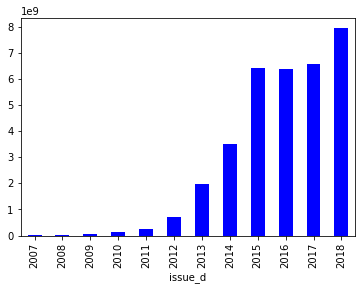

In [5]:
#convert date issued to date format
data['issue_d'] = data['issue_d'].apply(lambda x: dt.strptime(x,'%b-%Y').date())
#convert column from object to date
data['issue_d'] = pd.to_datetime(data['issue_d'])
#loan issue amount by year
data.groupby(data.issue_d.dt.year).agg('sum')['loan_amnt'].plot.bar(color = 'b')

In [6]:
#convert date issued to date format
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: dt.strptime(str(x),'%b-%Y').date())
#convert column from object to date
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [29]:
data['credit_length'] = (data['issue_d'] - data['earliest_cr_line'])/datetime.timedelta(days = 365)

In [31]:
# create ROI percent column
data['roi_dollar'] = data['total_pymnt'] - data['loan_amnt']
data['roi_percent'] = data['roi_dollar']/data['loan_amnt']
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,credit_length,roi_dollar,roi_percent
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,2003-08-01,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,12.342466,821.723917,0.228257
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,1999-12-01,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN

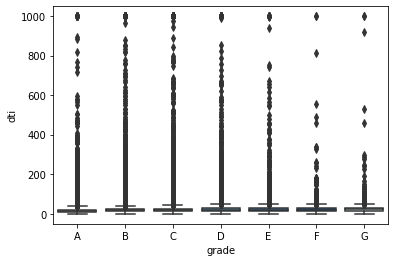

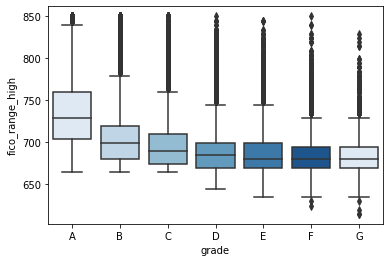

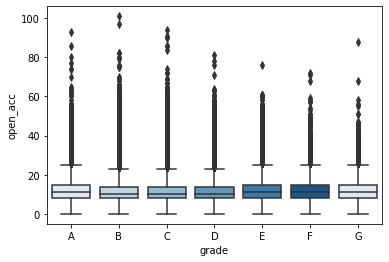

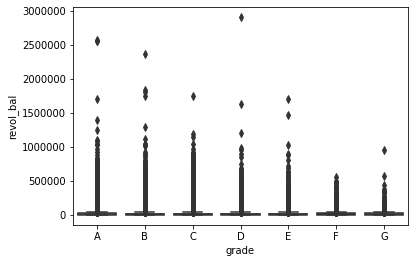

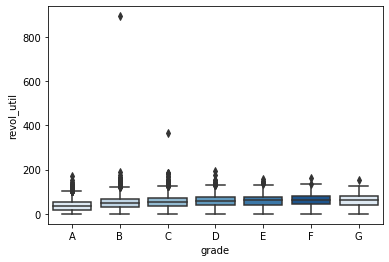

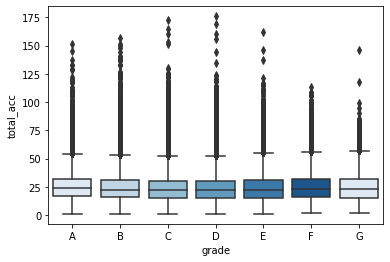

<Figure size 432x288 with 0 Axes>

In [32]:
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
for x in ['dti','fico_range_high','open_acc','revol_bal','revol_util','total_acc']:
    sns.boxplot(data = data, x = 'grade', y = x, palette = sns.color_palette("Blues"), order = order)
    plt.figure()

Text(0.5, 1.0, 'Revolving Utility By Grade')

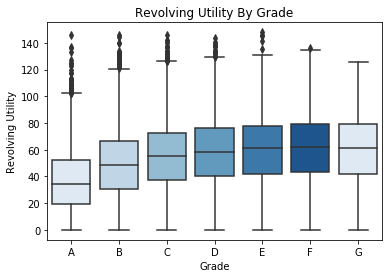

In [33]:
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
x = sns.boxplot(data = data[data['revol_util']<150], x = 'grade', y = 'revol_util', palette = sns.color_palette("Blues"), order = order)
x.set(xlabel = 'Grade', ylabel = 'Revolving Utility')
x.set_title('Revolving Utility By Grade')

Text(0.5, 1.0, 'FICO Score By Grade')

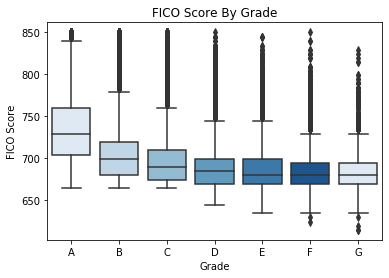

In [34]:
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
x = sns.boxplot(data = data, x = 'grade', y = 'fico_range_high', palette = sns.color_palette("Blues"), order = order)
x.set(xlabel = 'Grade', ylabel = 'FICO Score')
x.set_title('FICO Score By Grade')

Text(0.5, 1.0, 'Credit Length By Grade')

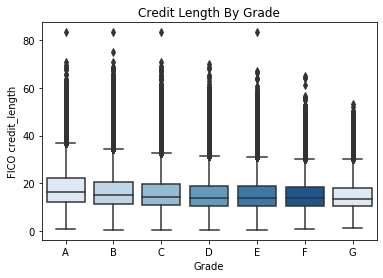

In [35]:
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
x = sns.boxplot(data = data, x = 'grade', y = 'credit_length', palette = sns.color_palette("Blues"), order = order)
x.set(xlabel = 'Grade', ylabel = 'FICO credit_length')
x.set_title('Credit Length By Grade')

[Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E'),
 Text(0, 0, 'F'),
 Text(0, 0, 'G')]

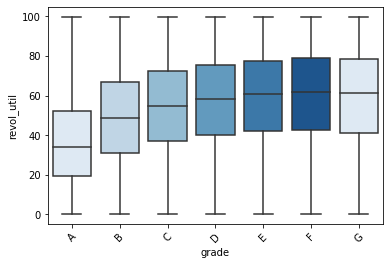

In [37]:
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
util = sns.boxplot(x = 'grade', y = 'revol_util', data = data.loc[data['revol_util']<100,:], order = order, palette = sns.color_palette("Blues"))
util.set_xticklabels(util.get_xticklabels(),rotation=45)

Text(0.5, 1, 'Income By Grade')

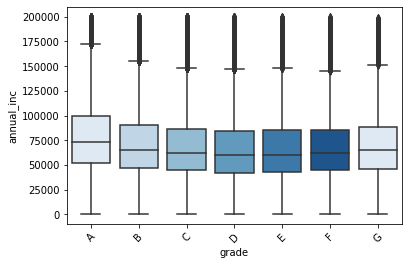

In [40]:
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
util = sns.boxplot(x = 'grade', y = 'annual_inc', data = data.loc[data['annual_inc']<200000,:], order = order, palette = sns.color_palette("Blues"))
util.set_xticklabels(util.get_xticklabels(),rotation=45)
x.set_title('Income By Grade')

In [49]:
grade_status = data[(data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Charged Off')].groupby(['grade','loan_status'])['loan_status'].count().reset_index(name = 'count')


In [84]:
i = pd.DataFrame(pd.DataFrame(grade_status[grade_status['loan_status'] == 'Charged Off']).set_index('grade')['count'])/grade_status.groupby('grade').sum()

In [86]:
i.reset_index()

,grade,count
0,A,0.060407
1,B,0.133852
2,C,0.224396
3,D,0.303822
4,E,0.384784
5,F,0.452024
6,G,0.499343


[Text(0, 0.5, 'Percent Default'), Text(0.5, 0, 'Grade')]

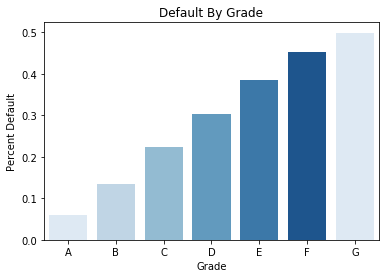

In [89]:
x = sns.barplot(data = i.reset_index(), x = 'grade', y = 'count', palette = sns.color_palette("Blues"))
x.set_title('Default By Grade')
x.set(xlabel='Grade', ylabel='Percent Default')